In [1]:
import cv2
import os

In [2]:
img = cv2.imread("src/Berry.jpg")

In [3]:
img.shape

(589, 960, 3)

In [4]:
img[0][0]

array([128, 176, 194], dtype=uint8)

In [5]:
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
cap = cv2.VideoCapture("movie/Cosmos.mp4")
if cap.isOpened() == False:
    sys.exit()
ret, frame = cap.read()
h, w = frame.shape[:2]
fourcc = cv2.VideoWriter_fourcc(*"XVID")
dst = cv2.VideoWriter("output/test.avi", fourcc, 30.0, (w,h))

while True:
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imshow("img", frame)
    dst.write(frame)
    if cv2.waitKey(30) == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [10]:
img = cv2.imread("src/Lena.jpg")
cv2.namedWindow("window", cv2.WINDOW_AUTOSIZE)
cv2.imshow("window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img = cv2.imread("src/Lena.jpg")
cv2.namedWindow("window", cv2.WINDOW_NORMAL)
cv2.imshow("window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
img = cv2.imread("src/Lena.jpg")
cv2.namedWindow("window", cv2.WINDOW_NORMAL)
cv2.resizeWindow("window", 640, 280)
cv2.imshow("window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
img = cv2.imread("src/grapes.jpg")
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
img.shape

(640, 960, 3)

In [15]:
size = (300, 200)
img_resize = cv2.resize(img, size)

In [16]:
img_resize.shape

(200, 300, 3)

In [17]:
cv2.imshow("resize", img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
img_area = cv2.resize(img, size, interpolation = cv2.INTER_AREA) 
img_linear = cv2.resize(img, size, interpolation = cv2.INTER_LINEAR)
cv2.imshow("area",img_area)
cv2.imshow("linear",img_linear)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
img = cv2.imread("src/grapes.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [20]:
img_gray.shape

(640, 960)

In [21]:
img_hsv.shape

(640, 960, 3)

In [22]:
cv2.imshow("img", img)
cv2.imshow("img", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
img_gray2 = cv2.imread("src/grapes.jpg",0)
cv2.imshow("img", img_gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
cv2.imshow("img", img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
img = cv2.imread("src/Lena.jpg")
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

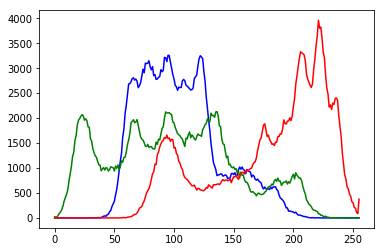

In [27]:
color_list = ["blue", "green" , "red"]
for i,j in enumerate(color_list):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color = j)

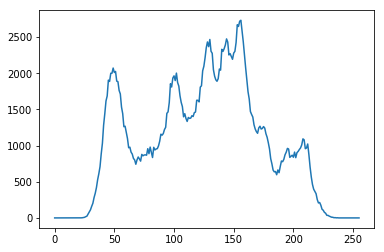

In [28]:
img_gray = cv2.imread("src/Lena.jpg",0)
hist2 = cv2.calcHist([img_gray], [0] ,None, [256], [0,256])
plt.plot(hist2)

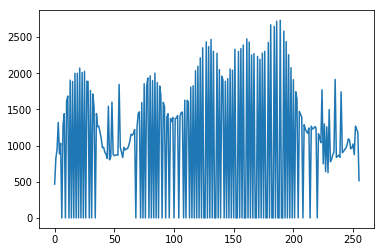

In [29]:
img_eq = cv2.equalizeHist(img_gray)
hist_e = cv2.calcHist([img_eq], [0] ,None, [256], [0,256])
plt.plot(hist_e)

In [30]:
cv2.imshow("img_gray" , img_gray)
cv2.imshow("img_eq" , img_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

γ変換(明るさ調節)

In [31]:
import cv2
import numpy as np

In [32]:
gamma = 0.5
img = cv2.imread("src/Berry.jpg")
gamma_cvt = np.zeros((256,1), dtype = np.uint8)
for i in range(256):
    gamma_cvt[i][0] = 255 * (float(i)/255) ** (1.0 / gamma)
    
img_gamma = cv2.LUT(img, gamma_cvt)

cv2.imshow("img", img)
cv2.imshow("img_gamma", img_gamma)
cv2.waitKey(0)
cv2.destroyAllWindows()

トラックバーの作成

In [33]:
def onTrackbar(positon):
    global trackValue
    trackValue = positon
    
trackValue = 100
cv2.namedWindow("img")
cv2.createTrackbar("track", "img", trackValue, 255, onTrackbar)
cv2.waitKey(0)
cv2.destroyAllWindows()

マウスイベント

In [34]:
def print_position(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print(x,y)
img = np.zeros((512,512), np.uint8)
cv2.namedWindow("img")
cv2.setMouseCallback("img", print_position)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

図形の描画

In [36]:
img= np.ones((500,500,3)) * 255

cv2.line(img, (0,0), (150,190), (255,0,0),2)
cv2.rectangle(img, (100,25), (300,150), (0,255,0), 4)
cv2.circle(img, (100,100), 55, (0,0,255),-1)
cv2.ellipse(img, (250,250),(100,50),20,0,360,(255,0,0),1)

pts = np.array([[100,30], [200,38], [200,80], [100,50]])
cv2.polylines(img, [pts], False,(100,255,0), 3)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, "OpenCV", (100,300), font, 1, (90,0,180), 3)#, cv2.LINE_AA)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
img = cv2.imread("src/grapes.jpg",0)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
threshold = 150
ret, img_th = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

In [39]:
ret

150.0

In [40]:
cv2.imshow("img_th", img_th)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
ret2, img_o = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

In [42]:
ret2 

121.0

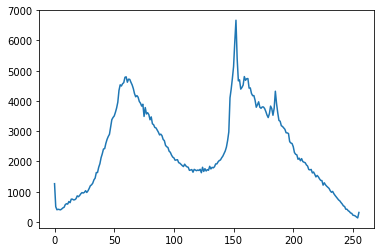

In [43]:
hist = cv2.calcHist([img], [0] ,None, [256], [0,256])
plt.plot(hist)

In [44]:
cv2.imshow("img_th", img_o)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
img = cv2.imread("src/grapes.jpg",0)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_ada = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 1)

In [47]:
cv2.imshow("img_ada", img_ada)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread("src/floor.jpg",0)

def onTrackbar(positon):
    global trackValue
    trackValue = positon
    
trackValue = 100
cv2.namedWindow("img")
cv2.createTrackbar("track", "img", trackValue, 255, onTrackbar)
while True:
#    ret, img_th = cv2.threshold(img, trackValue, 255, cv2.THRESH_BINARY)
    img_th = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,3, trackValue)
    cv2.imshow("img", img_th)
    cv2.imshow("src", img)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()